This PDF is in landscape mode, in order to accomodate the lage equations that are apperaring here.

In [1]:
import sys
import os
import io
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import math
import scipy.special as sp

In [2]:
# Up here are some golbal variables, so that they can be changed conveniently:

# Number of Bootstrap samples:
nbs = 200

# Number of values that are deleted from the beginning of the array due to thermalization
ntherm = 200

# Number of leapfrog steps
#   The number should be choosen so that the acceptence rate is above 50%.
#   More about that is written in the HMC algorithm
Nmd = 50

# Number of generated Phi values in the HMC
nTrajs = 500

# Homework 3 from Martin Gräf, Richard Baumann and Thomas Block

In this Homework we look at the long-range Ising model. The Hamiltonian for this model is defined as:

\begin{equation}
    H= - \frac{1}{2} \frac{J}{N} \sum_{i, j} s_i s_j -h \sum_i s_i = - \frac{1}{2} \hat{J} \sum_{i, j} s_i s_j -h \sum_i s_i
\end{equation}

After a Hubbard-Stratonovich transformation Z can be written as:

\begin{equation}
        Z = \left\{
		\begin{array}{ll}
		\int_{-\infty}^{\infty} \frac{d \varphi}{ \sqrt{2 \pi \beta \hat{J}}} exp \left[ -\frac{\varphi^2}{2 \beta \hat{J}} +N \log(2 \cosh(\beta h \pm \varphi))\right] , &\text{ if } J>0 \\
		\int_{-\infty}^{\infty} \frac{d \varphi}{ \sqrt{2 \pi \beta \hat{J}}} exp \left[ -\frac{\varphi^2}{2 \beta |\hat{J}|} +N \log(2 \cosh(\beta h \pm i \varphi))\right] ,& \text{ if } J<0 
		\end{array}
		\right.
\end{equation} 

In this exercise sheet we assume J>0. The expectation value of an operator O is given by:

\begin{equation}
    <O>= - \frac{1}{Z} \int_{-\infty}^{\infty} \frac{d \varphi}{ \sqrt{2 \pi \beta \hat{J}}} O\left[ \varphi \right] e^{-S\left[ \varphi \right]}
\end{equation}


## Exercise 1
The magnetization per site ist given as:

\begin{equation}
    <m>=\frac{1}{N \beta} \frac{\partial}{\partial h} \log(Z)
\end{equation}

The energy per site is defined as:

\begin{equation}
    <\epsilon>= - \frac{1}{N} \frac{\partial}{\partial \beta} \log(Z)
\end{equation}

### Derive corresponding expressions for $O\left[ \phi \right]$ for  magnetization (per site) and energy (per site). 

With the chain rule we know:

\begin{equation}
    \frac{\partial}{\partial x}_{x \in (\beta, h)} \log(Z) = \frac{1}{Z} \frac{\partial Z}{\partial x}_{x \in (\beta, h)}
\end{equation}

Therfore:

\begin{equation}
    <m>=\frac{1}{N \beta} \frac{\partial}{\partial h} \log(Z) = \frac{1}{N \beta} \frac{1}{Z} \frac{\partial Z}{\partial h} 
\end{equation}
\begin{equation}
    <\epsilon>= - \frac{1}{N} \frac{\partial}{\partial \beta} \log(Z) = \frac{1}{N} \frac{1}{Z} \frac{\partial Z}{\partial \beta}
\end{equation}

Now we can calculate:

\begin{equation}
	\frac{\partial Z}{\partial h} =
    \frac{\partial\int_{-\infty}^{\infty} \frac{d \varphi}{ \sqrt{2 \pi \beta \hat{J}}} exp \left[ -\frac{\varphi^2}{2 \beta \hat{J}} +N \log(2 \cosh(\beta h       \pm \varphi))\right]}{\partial h}
    =\int_{-\infty}^{\infty} d \varphi \frac{\partial \frac{1}{ \sqrt{2 \pi \beta \hat{J}}} exp \left[ -\frac{\varphi^2}{2 \beta \hat{J}} +N \log(2 \cosh           (\beta h \pm \varphi))\right]}{\partial h} \\
    = \int_{-\infty}^{\infty} d \varphi \frac{\beta N \tanh(\beta h \pm \varphi)}{ \sqrt{2 \pi \beta \hat{J}}} exp \left[ -\frac{\varphi^2}{2 \beta \hat{J}}      +N \log(2 \cosh(\beta h \pm \varphi))\right]
\end{equation}
<br/><br/>
\begin{equation}
    \frac{\partial Z}{\partial \beta}=
    \frac{\partial\int_{-\infty}^{\infty} \frac{d \varphi}{ \sqrt{2 \pi \beta \hat{J}}} exp \left[ -\frac{\varphi^2}{2 \beta \hat{J}} +N \log(2 \cosh(\beta h       \pm \varphi))\right]}{\partial \beta}=
    \int_{-\infty}^{\infty} d \varphi \frac{\partial \frac{1}{ \sqrt{2 \pi \beta \hat{J}}} exp \left[ -\frac{\varphi^2}{2 \beta \hat{J}} +N \log(2 \cosh           (\beta h \pm \varphi))\right]}{\partial \beta} \\
    = \int_{-\infty}^{\infty} d \varphi \frac{h N \tanh(\beta h \pm \varphi) +\frac{\varphi^2}{2 \hat{J} \beta^2}}{ \sqrt{2 \pi \beta \hat{J}}}-\frac{ \hat{J}      }{(2J\beta)^{2/3}\sqrt{\pi}} exp \left[ -\frac{\varphi^2}{2 \beta \hat{J}}+N \log(2 \cosh(\beta h \pm \varphi))\right] 
\end{equation}

<br/><br/>

Therefore we get:
\begin{equation}
    <m> = \frac{1}{N \beta} \frac{1}{Z} \frac{\partial Z}{\partial h} 
        = \frac{1}{N \beta} \frac{1}{Z} \int_{-\infty}^{\infty} d \varphi \frac{\beta N \tanh(\beta h \pm \varphi)}{ \sqrt{2 \pi \beta \hat{J}}} exp \left[                 -\frac{\varphi^2}{2 \beta \hat{J}}+N \log(2 \cosh(\beta h \pm \varphi))\right]\\
        =\frac{1}{Z} \int_{-\infty}^{\infty} \frac{d \varphi }{ \sqrt{2 \pi \beta \hat{J}}} \underbrace{\tanh(\beta h \pm \varphi)}_{\substack{O(\varphi)}}             exp \underbrace{ \left[-\frac{\varphi^2}{2 \beta \hat{J}}+N \log(2 \cosh(\beta h \pm \varphi))\right]}_{\substack{-S(\varphi)}}
\end{equation}
<br/><br/>
\begin{equation}
    <\epsilon> = - \frac{1}{N} \frac{1}{Z} \frac{\partial Z}{\partial \beta}
        = - \frac{1}{NZ} \int_{-\infty}^{\infty} d \varphi \frac{ h N \tanh(\beta h \pm \varphi) +\frac{\varphi^2}{2 \hat{J} \beta^2}}{ \sqrt{2              \pi \beta \hat{J}}}-\frac{ \hat{J}}{(2J\beta)^{2/3}\sqrt{\pi}} exp \left[ -\frac{\varphi^2}{2 \beta \hat{J}}+N \log(2 \cosh(\beta h \pm                                 \varphi))\right] 
\end{equation}

Because we want to define everything in terms of $\beta h$ and $\beta J$ we take the expected value of $\beta \epsilon$:

\begin{equation}
    <\beta \epsilon> = 
           - \frac{\beta}{NZ} \int_{-\infty}^{\infty} d \varphi \frac{ h N \tanh(\beta h \pm \varphi) +\frac{\varphi^2}{2 \hat{J}\beta^2}}{ \sqrt{2\pi \beta                 \hat{J}}}-\frac{ \hat{J}}{(2\beta \hat{J})^{2/3}\sqrt{\pi}} exp \left[ -\frac{\varphi^2}{2 \beta \hat{J}}+N \log(2 \cosh(\beta h \pm                                 \varphi))\right] \\
        = - \frac{1}{NZ} \int_{-\infty}^{\infty} d \varphi \frac{ \beta h N \tanh(\beta h \pm \varphi) +\frac{\varphi^2}{2 \hat{J} \beta}}{\sqrt                         {2\pi \beta \hat{J}}}-\frac{ 1}{(2)^{2/3}\sqrt{\pi \beta \hat{J}}} exp \left[ -\frac{\varphi^2}{2 \beta \hat{J}}+N \log(2 \cosh(\beta h \pm \varphi))\right] \\
        = - \frac{1}{NZ} \int_{-\infty}^{\infty} d \varphi \frac{ \beta h N \tanh(\beta h \pm \varphi) +\frac{\varphi^2}{2 \hat{J} \beta}}{\sqrt                         {2\pi \beta \hat{J}}}-\frac{ 1}{(2)^{2/3}\sqrt{\pi \beta \hat{J}}} exp \left[ -\frac{\varphi^2}{2 \beta \hat{J}}+N \log(2 \cosh(\beta h \pm \varphi))            \right]\\
        = - \frac{1}{NZ} \int_{-\infty}^{\infty} d \varphi \frac{1}{\sqrt{2\pi \beta \hat{J}}}  \underbrace{\left(\beta h N \tanh(\beta h \pm \varphi) +\frac{\varphi^2}{2 \hat{J} \beta} -0.5 \right)}_{\substack{O(\varphi)}} exp \underbrace{ \left[-\frac{\varphi^2}{2 \beta \hat{J}}+N \log(2 \cosh(\beta h \pm \varphi))\right]}_{\substack{-S(\varphi)}}
\end{equation}

In [3]:
# Generated value of the mean magnetization. We are missing a factor 1/Z, which will be added later on.
def O_magnetization(phi, N, beta_J, beta_h):
    return(np.tanh(beta_h+phi))

# Generated value of the mean energy multiplied with beta. We are missing a factor 1/(NZ), which will be added later on.
def O_energy_beta(phi, N, beta_J, beta_h):
    return(-((beta_h*N*np.tanh(beta_h+phi))+phi**2/(2*beta_J/N)-0.5)/N)

## Exercise 2

### Determine the equations of motion (EoMs) for this Hamiltonian by applying the Hamilton equations.

The artificial Hamilton operator of the problem is defined as:

\begin{equation}
    H=+\dfrac{p^2}{2}+\dfrac{{\varphi}^2}{2{\beta}\hat{J}}-N\ln\left(2\cosh\left({\varphi}+{\beta}h\right)\right).
\end{equation}

The equations of motion are given as:

\begin{equation}
    \dot{\varphi} = \dfrac{\partial}{\partial p} H = p
\end{equation}
\begin{equation}
    \dot{p} = -\dfrac{\partial}{\partial \varphi} H = 
    -\dfrac{{\varphi}}{{\beta}\hat{J}}+\dfrac{N\sinh\left({\varphi}+{\beta}h\right)}{\cosh\left({\varphi}+{\beta}h\right)}
\end{equation}

These can be implemented as:

In [4]:
# The artificial Hamiltonian as defined above
def hamiltonian_artificial(p , phi, N, beta_J, beta_h):
    return ((p**2/2)+(phi**2/(2*beta_J/N))-N*math.log(2*math.cosh(phi+beta_h)))

# phi dot as defined in the function above
def phi_dot(p , phi, N, beta_J, beta_h):
    return p

# p dot as defined in the function above
def p_dot(p , phi, N, beta_J, beta_h):
    return (-(phi/(beta_J/N))+((N*math.sinh(phi+beta_h)/(math.cosh(phi+beta_h)))))

## Exercise 3

### Code up the leapfrog algorithm to evolve $(p_{0}, \Phi{0}) \rightarrow (p_{f} , \Phi{f} )$. Verify the convergence claim $H(p_{f} , \Phi{f}) = H(p_{0}, \Phi{0}) + O(\epsilon^2)$.

The leapfrog algorithm consists of the following steps:

* Set $(p_{end}, \Phi_{end}) = (p_{start}, \Phi_{start})$ <br/><br/>
* Make the first half step of $\Phi$: <br/><br/>
$ \Phi_{end}=\Phi_{end}+\frac{\epsilon}{2} \dot{\Phi}_{end} $ <br/><br/>
* Make $N_{md}$ steps: <br/><br/>
$ p_{end}=p_{end} + \epsilon \dot{p}_{end} $ <br/><br/>
$ \Phi_{end}=\Phi_{end} + \epsilon \dot{\Phi}_{end} $ <br/><br/>
* Make the last half step: <br/><br/>
$ \Phi_{end}=\Phi_{end}+\frac{\epsilon}{2} \dot{\Phi}_{end} $ <br/><br/>
return $(p_{end}, \Phi_{end})$

This algorithm is implemented below:

In [5]:
# Here could also be a parameter called trajLength, but on the exercise sheet
# it was given that this is supposed to be 1.
def leapfrog(p_start, phi_start, Nmd, N, beta_J, beta_h):
    p_end = p_start
    phi_end = phi_start
    
    # epsilon = trajLength/Nmd
    epsilon = 1/Nmd
    
    # first half step of the leap frog
    phi_end = phi_end + (epsilon/2) * phi_dot(p_end,phi_end, N, beta_J, beta_h)
    
    # Now do all the steps untill the last one:
    for i in range((Nmd)-1):
        p_end = p_end + epsilon*p_dot(p_end, phi_end, N, beta_J, beta_h)
        phi_end = phi_end + epsilon*phi_dot(p_end,phi_end, N, beta_J, beta_h)
        
    # last half step
    p_end = p_end + epsilon * p_dot(p_end,phi_end, N, beta_J, beta_h)
    phi_end = phi_end + (epsilon/2) * phi_dot(p_end,phi_end, N, beta_J, beta_h)
    
    return (p_end, phi_end)

Now we can verify that our leapfrog approach is working as intended by comparing it to a picture that was given to us in the exercise sheet. 

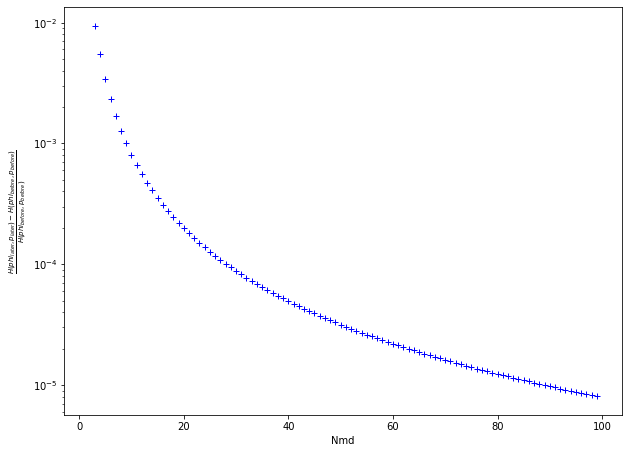

In [6]:
def test_leapfrog(p, phi, N=20, beta_J=1, beta_h=0.5):
    # Initilizing Variables, that will be used later
    # to calculate H(p_f, phi_f)
    p_f = phi_f = 0

    # Initilizing the arrays for future plotting
    # The Nmd array goes from 2 to 100, the H_array 
    # is the same length filled with zeros
    Nmd_array = np.arange(2, 100, 1)
    H_array = np.zeros(len(Nmd_array))

    # Calculating H(p_0, phi_0)
    energy_before=hamiltonian_artificial(p, phi, N, beta_J, beta_h)

    for i in range(len(H_array)):
        # Doing the leapfrog algorithm
        p_f, phi_f = leapfrog(p, phi, Nmd_array[i], N, beta_J, beta_h)

        # Calculating the energy after the leapfrog
        energy_after = hamiltonian_artificial(p_f, phi_f, N, beta_J, beta_h)

        # This is calculated to see, if the picture we get 
        # matches the picture from the exercise sheet.
        H_array[i] = (energy_after-energy_before)/energy_before
    plt.figure(figsize=(10, 7.5))
    plt.plot(Nmd_array, H_array, "b+", lw=1)
    plt.xlabel("Nmd")
    plt.ylabel(r"$\frac{H(phi_{later}, p_{later})-H(phi_{before}, p_{before})}{H(phi_{before}, p_{before})}$")
    plt.yscale("log")
    plt.savefig("pictures/leapfrog_test.png", dpi=600)

test_leapfrog(1, 1)

If we compare that to the picture, that was given on exercise sheet 3, we can see that the pictures are very similar. Therefore we can say that the leapfrog algorithm is working as intended.

## Exercise 4
### With your working leapfrog integrator, code up the HMC algorithm for the long-range Ising model.

The HMC (Hybrid Monte Carlo) algorithm works like that:
* Start with a initial $ \Phi_{start} $<br/><br/>
* Sample $ p_{start} $ from the normal distribution (N$\in \left[0, 1 \right]$) <br/><br/>
* Calculate $ H_{start}(  \Phi_{start}, p_{start}  ) $ <br/><br/>
* Use the leapfrog algorithm to get $\Phi_{end}, p_{end}$ <br/><br/>
* Calculate $ H_{end}(  \Phi_{end}, p_{end}  ) $ <br/><br/>
* draw y from the normal distribution (N$\in \left[0, 1 \right]$) <br/><br/>
* Accept $\Phi_{end}$ if y $\leq $  $ exp(H_{end}(\Phi_{end}, p_{end})-H_{start}(\Phi_{start}, p_{start})) $ <br/><br/>
* Reject otherwise

In [7]:
def generate_phi(N, beta_J, beta_h):

    # Using the global variables defined in the header:
    # Number of jumps, that the leapfrog does
    global Nmd

    # Number of generated phi values
    global nTrajs

    # initilizing some arrays and numbers that are needed later:
    #   With the initial value for phi of 0.9
    phi_array = [0.9]

    # Array for saving the probabilities (to check if it drops <50%)
    prob = []
    p_step = phi_step = 0

    for traj in range(nTrajs):
        # We are sampling p from the normal distribution...
        p_start = rd.random()

        # and taking the phi from the last step.
        phi_start = phi_array[-1]

        # calculate the energy before the leapfrog
        energy_start = hamiltonian_artificial(p_start, phi_start, N, beta_J, beta_h)
        
        # now do leapfrog to get new values for p and phi
        p_step, phi_step = leapfrog(p_start, phi_start, Nmd, N, beta_J, beta_h)
        
        # calculate the energy after the leapfrog
        energy_end = hamiltonian_artificial(p_step, phi_step, N, beta_J, beta_h)
        
        # now do accept/reject
        # if the random number is equal/less then the difference between the 
        # energies, accept!
        if rd.random() <= np.exp(energy_start-energy_end):
            phi_array.append(phi_step)
            prob.append(1.)
        else:  # reject
            phi_array.append(phi_start)
            prob.append(0.)

    # Output if the prob is lower then 0.5, informing when it happend where
    if np.average(np.array(prob))<0.5:
        print("probability smaller then 0.5 at N=", N, " beta_J= ", beta_J, " beta_h= ", beta_h)

    # Return all Phi-Values
    return (np.array(phi_array))

While we are at it, we can define the bootstrap method (hopefully it is correct this time :) ).

In [8]:
def bootstrap_error(phi_array, nBS):  
    n=phi_array.size
    bsmean = np.array([])
    for bs in range (nBS):
        index=np.random.randint(n,size=n) # random bootstrap indices
        bsmean = np.append(bsmean,np.array([phi_array[index[i]] for i in range(n)]).mean())
    return bsmean.std()

## Exercise 5
### Setting h = ($\beta$ h) = 0.5 and using some values of N ranging from 5 to 20, calculate the average energy per site and mean magnetization per site as a function of J = ($\beta$J) $\in \left[0.2, 2 \right]$. Tune Nmd such that the acceptance rate is above 50%

The analytical value for Z is given by:

\begin{equation}
    Z = \sum^{N}_{n=0} \binom{N}{n}e^{\frac{1}{2} \beta \hat{J} (N-2n)^2 + \beta h (N-2n)}
\end{equation}




In [9]:
def Z_analytical(N, beta_J, beta_h):
    sum=0
    for n in range(N):
        sum = sum + sp.binom(N, n)*np.exp((0.5*beta_J/N)*(N-2*n)**2+beta_h*(N-2*n))
    return sum

The analytical solution of <$\beta$$\epsilon$> is defined as:

\begin{equation}
    <\beta \epsilon> = -\frac{1}{NZ} \sum^{N}_{n=0} \binom{N}{n} \left[ \frac{1}{2} \beta \hat{J} (N-2n)^2 + \beta h (N-2n)   \right] e^{\frac{1}{2} \beta \hat{J} (N-2n)^2 + \beta h (N-2n)}
\end{equation}

Which is implemented below:

In [10]:
# Implementation of the mean energy
def mean_energy_analytical(N, beta_J, beta_h):
    Z=Z_analytical(N, beta_J, beta_h)
    sum=0
    for n in range(N):
        sum = sum + (sp.binom(N, n)*(0.5*beta_J/N)*(N-2*n)**2+beta_h*(N-2*n))*np.exp((0.5*beta_J/N)*(N-2*n)**2+beta_h*(N-2*n))
    return(-sum/(Z*N))

Now we can take a look on how the mean analytical energy depends on J for different N. We look at:

N $\in$ (6, 10, 14, 18) <br/><br/>
J $\in \left[0.2, 2\right]$

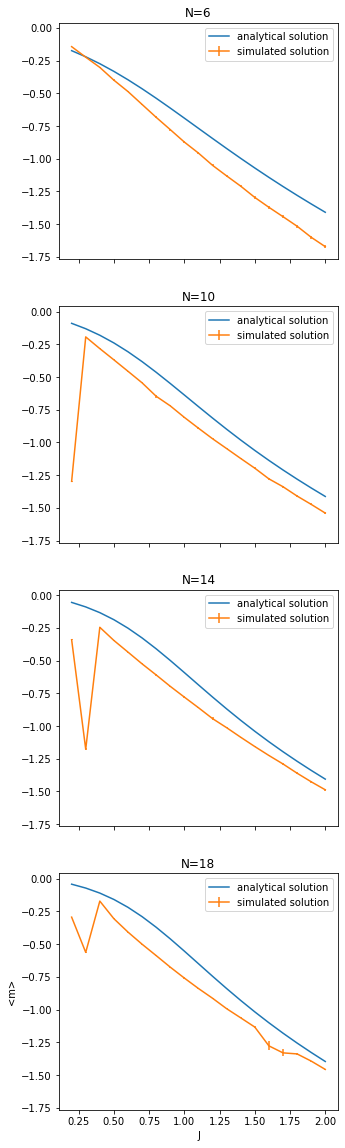

In [11]:
def polt_mean_energy(beta_h):

    #Using the number of bootstrap samples defined in the header
    global nbs

    # Delete the first ntherm values for thermalization (number in the header)
    global ntherm

    """
    First the analytical solutions
    """

    # Initilize the arrays:
    #   The values of N and beta*J are as mentioned above
    N_array=[6, 10, 14, 18]
    beta_J_array=np.arange(0.2, 2.01, 0.1)

    # This is the array for the mean energy values (N*J-big)
    mean_energy_analytical_array = np.zeros(len(N_array)*len(beta_J_array)).reshape(len(N_array), len(beta_J_array))
    
    # Generate analytical solution for all N
    for j in range(len(N_array)):

        # Generate the values for one specific N
        for i in range(len(beta_J_array)):
            mean_energy_analytical_array[j][i]=mean_energy_analytical(N_array[j], beta_J_array[i], beta_h)
    
    """
    Now the generated solutions
    """
    # Again we are initilizing an array for future values
    mean_energy_simulated_array = np.zeros(len(N_array)*len(beta_J_array)).reshape(len(N_array), len(beta_J_array))
    mean_energy_simulated_array_error = np.zeros(len(N_array)*len(beta_J_array)).reshape(len(N_array), len(beta_J_array))

    # Generate simulated solution for all N
    for j in range(len(N_array)):

        # Generate the values for one specific N
        for i in range(len(beta_J_array)):

        # Generating the phi values using the HMC. Also deleting the first ntherm (definied in the header)
            # values (accounting for the thermalization) 
            phi_array = np.delete(generate_phi(N_array[j], beta_J_array[i], beta_h),np.arange(ntherm))

            # Calculating the O-Values for the energies
            expected_energy = O_energy_beta(phi_array, N_array[j], beta_J_array[i], beta_h)

            # Getting the error with Bootstrap
            mean_energy_simulated_array_error[j][i] = bootstrap_error(expected_energy, nbs)

            # Computing the expectation value of the energies by summing over the O-Values 
            # and deviding by the number of values
            mean_energy_simulated_array[j][i] = np.sum(expected_energy)/len(expected_energy)

    # Plot the mean energies
    fig, axs = plt.subplots(4, sharex=True, sharey=True)
    fig.set_size_inches(5, 20)
    for j in range(len(N_array)):
        axs[j].plot(beta_J_array, mean_energy_analytical_array[j], label=("analytical solution"))
        axs[j].errorbar(beta_J_array, mean_energy_simulated_array[j], yerr=mean_energy_simulated_array_error[j], label=("simulated solution"))
        axs[j].legend(loc="best")
        axs[j].title.set_text("N=" + str(N_array[j]))
    plt.legend(loc="best")
    plt.xlabel("J")
    plt.ylabel("<m>")
    plt.savefig("pictures/mean_energy.png", dpi=600)

polt_mean_energy(0.5)

The analytical solution of <m> is defined as:

\begin{equation}
    <m> = \frac{1}{NZ} \sum^{N}_{n=0} \binom{N}{n} (N-2n) e^{\frac{1}{2} \beta \hat{J} (N-2n)^2 + \beta h (N-2n)}
\end{equation}

The analytical equation for <m> is implemented below.

In [12]:
# Implementation of the mean energy
def mean_magnetization_analytical(N, beta_J, beta_h):
    Z=Z_analytical(N, beta_J, beta_h)
    sum=0
    for n in range(N):
        sum = sum + (sp.binom(N, n)*(N-2*n)*np.exp((0.5*beta_J/N)*(N-2*n)**2+beta_h*(N-2*n)))
    return(sum/(Z*N))

Analogue to before, we take a look on how the mean magnetization depends on J for different N. We look at:

N $\in$ (6, 10, 14, 18) <br/><br/>
J $\in \left[0.2, 2\right]$

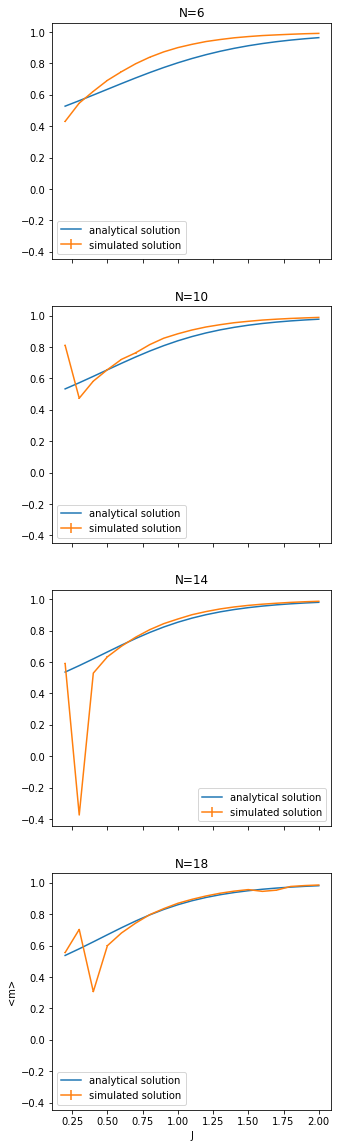

In [13]:
def polt_mean_magnetization_analytical(beta_h):

    #Using the number of bootstrap samples defined in the header
    global nbs

    # Delete the first ntherm values for thermalization (number in the header)
    global ntherm

    """
    First the analytical solutions
    """

    # Initilize the arrays:
    #   The values of N and beta*J are as mentioned above
    N_array=[6, 10, 14, 18]
    beta_J_array=np.arange(0.2, 2.01, 0.1)

    # This is the array for the mean energy values (N*J-big)
    mean_magnetization_analytical_array=np.zeros(len(N_array)*len(beta_J_array)).reshape(len(N_array), len(beta_J_array))
    
    # Generate analytical solution for all N
    for j in range(len(N_array)):

        # Generate the values for one specific N
        for i in range(len(beta_J_array)):
            mean_magnetization_analytical_array[j][i]=mean_magnetization_analytical(N_array[j], beta_J_array[i], beta_h)
    
    """
    Now the generated solutions
    """
    #Again we are initilizing an array for future values
    mean_magnetization_simulated_array = np.zeros(len(N_array)*len(beta_J_array)).reshape(len(N_array), len(beta_J_array))
    mean_magnetization_simulated_array_error = np.zeros(len(N_array)*len(beta_J_array)).reshape(len(N_array), len(beta_J_array))
    # Generate simulated solution for all N
    for j in range(len(N_array)):

        # Generate the values for one specific N
        for i in range(len(beta_J_array)):

            # Generating the phi values using the HMC. Also deleting the first ntherm (definied in the header)
            # values (accounting for the thermalization) 
            phi_array = np.delete(generate_phi(N_array[j], beta_J_array[i], beta_h),np.arange(ntherm))

            # Calculating the O-Values for the magnetization
            expected_magnetization = O_magnetization(phi_array, N_array[j], beta_J_array[i], beta_h)

            # Getting the error with Bootstrap
            mean_magnetization_simulated_array_error[j][i] = bootstrap_error(expected_magnetization, nbs)

            # Computing the expectation value of the magnetization by summing over the O-Values 
            # and deviding by the number of values
            mean_magnetization_simulated_array[j][i] = np.sum(expected_magnetization)/len(expected_magnetization)

    # Plot the mean energies
    fig, axs = plt.subplots(4, sharex=True, sharey=True)
    fig.set_size_inches(5, 20)
    for j in range(len(N_array)):
        axs[j].plot(beta_J_array, mean_magnetization_analytical_array[j], label=("analytical solution"))
        axs[j].errorbar(beta_J_array, mean_magnetization_simulated_array[j], yerr=mean_magnetization_simulated_array_error[j], label=("simulated solution"))
        axs[j].legend(loc="best")
        axs[j].title.set_text("N=" + str(N_array[j]))
    plt.legend(loc="best")
    plt.xlabel("J")
    plt.ylabel("<m>")
    plt.savefig("pictures/mean_magnetization.png", dpi=600)

polt_mean_magnetization_analytical(0.5)

We can see, that the simulated results are looking similar to the analytical ones. It appears that for higher N we get more agreeance between the analytical and simulated results. However, for both, magnetization and energy we get strage values for small $J \beta$ at high values for N. This seems to be a systematical problem with the algortihm. 